# ISLR Exercises Chapters 5, 6, and 7

## Chapter 5 Exercise 3

### (a)

* Explain how ${k}$-fold cross-validation is implemented.

All training data is split into ${k}$ partitions referred to as folds. This allows for a model to be trained on all but one of the folds (${k - 1}$) and then tested on the fold which was held out. Each of the folds will be used as the test set meaning this process will be repeated ${k}$ times. This essentially simulates having an OOS validation set. The ${k}$ performance scores are then averaged providing an aggregate measure of performance which can be regarded as a validation set performance. 






### (b)

* What are the advantages and disadvantages of ${k}$-fold cross-validation relative to The validation set approach and LOOCV?


VS Validation Set:

Advantages:
* The validation set has a major weakness in that it must hold out a significant amount of data for the validation set. Broadly speaking, models perform better with more training data. Comparitively, ${k}$-Fold CV allows for a model that has been train and validated using all the data. 

* There's less of a risk of over-estimating the test error due to the specific validation set available. ${k}$-Fold CV allows for reduced variability by using all the data to both train and test. 


Disadvantages: 

* ${k}$-Fold CV is more computationaly expensive, requiring the model to be fit ${k}$ times. 

* The validation set technique is less complex and more interpretable. 

VS LOOCV

Advantages:
* ${k}$-Fold CV beats out LOOCV when it comes to computational efficiency. Normally, ${k}$-Fold CV is applied with 5 or 10 folds, while LOOCV will fit the model as many times as there are observations in the training data. Which is costly. 

Disadvantages:
* LOOCV can be more effective than ${k}$-Fold CV in some scenarios mainly due to the risk of underestimating test error rate, similar to the validation set technique. LOOCV on the other hand offers a more stable measure of test error rate. 

## Chapter 5 Exercise 8

### (a)

* Generate a simulated data set as follows:

```r
x = rnorm(100)
y = x - 2*x^2 + rnorm (100)
```

In [144]:
x = rnorm(100)
y = x - 2*x^2 + rnorm (100)

* In this data set, what is ${n}$ and what is ${p}$? Write out the model used to generate the data in equation form.

${n = 100, p = 2}$

### (b)

* Create a scatterplot of X against Y. Comment on what you find.

Loading required package: mgcv

Loading required package: nlme


Attaching package: 'nlme'


The following object is masked from 'package:carat':

    getData


The following object is masked from 'package:dplyr':

    collapse


This is mgcv 1.8-38. For overview type 'help("mgcv-package")'.



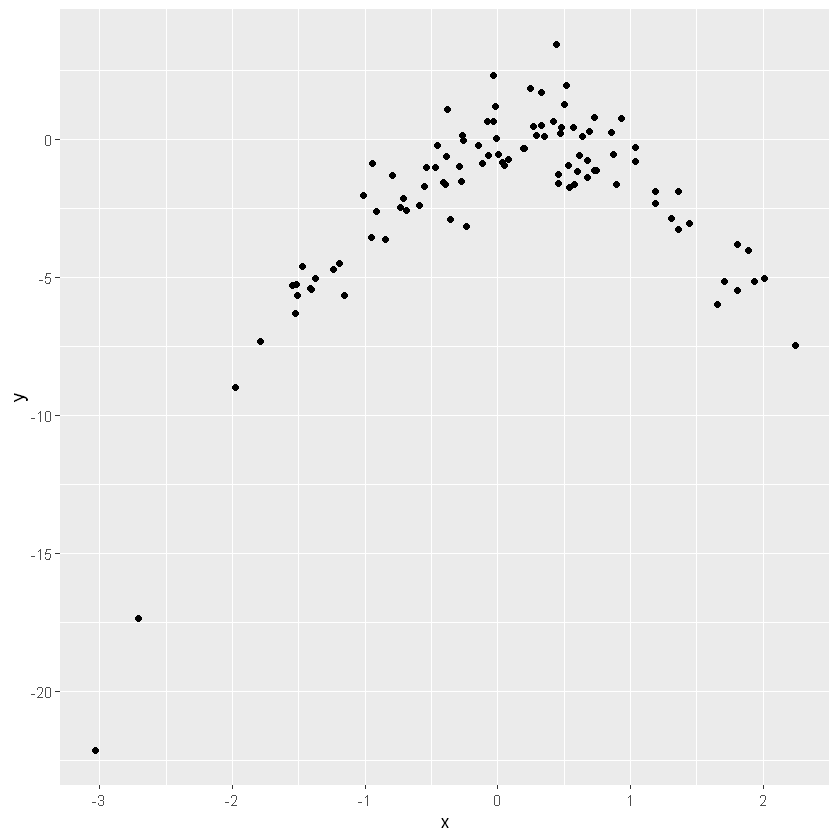

In [227]:
if (!require('ggplot2')){
    install.packages('ggplot2')
    library('ggplot2')
}
if (!require('dplyr')){
    install.packages('dplyr')
    library('dplyr')
}
if (!require('bestglm')){
    install.packages('bestglm')
    library('bestglm')
}
if (!require('boot')){
    install.packages('boot')
    library('boot')
}
if (!require('stats')){
    install.packages('stats')
    library('stats')
}
if (!require('ISLR')){
    install.packages('ISLR')
    library('ISLR')
}
if (!require('caret')){
    install.packages('caret')
    library('caret')
}
if (!require('glmnet')){
    install.packages('glmnet')
    library('glmnet')
}
if (!require('analogue')){
    install.packages('analogue')
    library('analogue')
}
if (!require('pls')){
    install.packages('pls')
    library('pls')
}
if (!require('MASS')){
    install.packages('MASS')
    library('MASS')
}

if (!require('gridExtra')){
    install.packages('gridExtra')
    library('gridExtra')
}
if (!require('olsrr')){
    install.packages('olsrr')
    library('olsrr')
}
if (!require('mgcv')){
    install.packages('mgcv')
    library('mgcv')
}
ggplot(mapping=aes(x=x,y=y)) +
    geom_point()

The resulting plot follows a quadratic form.

### (c)

* Set a random seed, and then compute the LOOCV errors that result form fitting the following four models using least squares: 

${Y = \beta_0 + \beta_1X + \epsilon}$

${Y = \beta_0 + \beta_1X + \beta_2X^2 \epsilon}$

${Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 \epsilon}$

${Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \beta_4X^4 \epsilon}$

${Y = \beta_0 + \beta_1X + \epsilon}$:

In [146]:
LOOCV <- function(data, formula) {
  model <- glm(formula(formula), data = data)
  mean(((data$y - predict(model))/(1 - boot::glm.diag(model)$h))^2)
}

set.seed(1)
data = data.frame(x = x, y = y)

LOOCV(data, "y ~ x") 

[1] 11.00702

${Y = \beta_0 + \beta_1X + \beta_2X^2 \epsilon}$:

In [147]:
LOOCV(data, "y ~ x + I(x^2)")

[1] 1.143616

${Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 \epsilon}$

In [148]:
LOOCV(data, "y ~ x + I(x^2) + I(x^3)")

[1] 1.15917

${Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \beta_4X^4 \epsilon}$

In [149]:
LOOCV(data, "y ~ x + I(x^2) + I(x^3) + I(x^4)")

[1] 1.165726

### (d)

* Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

In [150]:
set.seed(2)

LOOCV(data, "y ~ x") 

[1] 11.00702

In [151]:
LOOCV(data, "y ~ x + I(x^2)")

[1] 1.143616

In [152]:
LOOCV(data, "y ~ x + I(x^2) + I(x^3)")

[1] 1.15917

In [153]:
LOOCV(data, "y ~ x + I(x^2) + I(x^3) + I(x^4)")

[1] 1.165726

These are the exact same error rates. Using LOOCV is deterministic and always results in the same error rate.

### (e)

The third degree polynomial model has the lowest error rate. This is surprising considering the data follows an almost exact quadratic form.

### (f)

* Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

In [154]:
summary(glm(y ~ x, data = data))$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-2.169919,0.317039,-6.844327,6.722201e-10
x,1.467402,0.307477,4.772395,6.360688e-06


In [155]:
summary(glm(y ~ x + I(x^2), data = data))$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-0.05879841,0.12985824,-0.4527892,6.517117e-01
x,0.99772782,0.10390606,9.6022101,9.694130e-16
I(x^2),-1.96749015,0.07026203,-28.0021822,2.860198e-48


In [156]:
summary(glm(y ~ x + I(x^2) + I(x^3), data = data))$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-0.07216244,0.13232834,-0.5453287,5.867923e-01
x,0.91616509,0.17511483,5.2317962,9.838584e-07
I(x^2),-1.94652382,0.07923862,-24.5653417,3.479751e-43
I(x^3),0.02655486,0.04580603,0.5797241,5.634588e-01


In [157]:
summary(glm(y ~ x + I(x^2) + I(x^3) + I(x^4), data = data))$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-0.125375549,0.15512110,-0.8082430,4.209700e-01
x,0.990306224,0.20824085,4.7555809,7.040784e-06
I(x^2),-1.828100424,0.19558778,-9.3467006,4.117416e-15
I(x^3),-0.008205761,0.06973051,-0.1176782,9.065711e-01
I(x^4),-0.024055074,0.03630189,-0.6626396,5.091659e-01


The coefficients for the third order and fourth order terms are not statistically significant, meaning there's no reason to include them in the model.

## Chapter 6 Exercise 1

We perform best subset, forward stepwise, and backward stepwise
selection on a single data set. For each approach, we obtain p + 1
models, containing 0, 1, 2,...,p predictors. Explain your answers:

### (a)

* Which of the three models with k predictors has the smallest
training RSS?

Best subset will yield the lowest RSS as it will take into consideration every possible combination of the k predictors until it finds the optimal combination. 

However, stepwise, forward, and backward selection could potentially select the same subset as best subset selection more efficiently. Best subset is computationally as it fits ${2^p}$ models.

### (b)

* Which of the three models with k predictors has the smallest test RSS?

We can only judge how these feature selection methods impact training error. In order to judge their impact on test error rate and more broadly their ability to be flexible and generalize to OOS data, we need to split the data into train and test sets. 

### (c)

i. The predictors in the k-variable model identified by forward
stepwise are a subset of the predictors in the (k+1)-variable
model identified by forward stepwise selection.

* True, the ${k + 1}$-variable model will include the predictors of the ${k}$-variable model, plus the next most significant predictor.

ii. The predictors in the k-variable model identified by backward stepwise are a subset of the predictors in the (k + 1)-
variable model identified by backward stepwise selection.

* True, the ${k}$-variable will include all the predictors the ${k + 1}$-variable contains besides the one removed by the algorithm, since this is backward stepwise selection ${k + 1}$ comes before the ${k}$-variable model.

iii. The predictors in the k-variable model identified by backward stepwise are a subset of the predictors in the (k + 1)-
variable model identified by forward stepwise selection.

* False, backwards stepwise selection starts from a full model with all the significant predictors, while forwards stepwise selection starts from a null model. Therefore, will normally not be true.

iv. The predictors in the k-variable model identified by forward
stepwise are a subset of the predictors in the (k+1)-variable
model identified by backward stepwise selection.

* False, again this is not true overall due to the differences in starting points. 

v. The predictors in the k-variable model identified by best
subset are a subset of the predictors in the (k + 1)-variable
model identified by best subset selection.

* False, the best subset method works with combinations of predictors on each iteration so there's no certainty at all this could hold true.

## Chapter 6 Exercise 9

In this exercise, we will predict the number of applications received
using the other variables in the College data set.

In [158]:
data('College')
head(College)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


In [159]:
print(ncol(College))

print(nrow(College))

[1] 18
[1] 777


### (a)

* Split the data set into a training set and test set

In [160]:
# 70:30 split 

smpl_size = floor(0.7 * nrow(College))

#set seed to make the split reproducible
set.seed(0)
#create random sample of indexes for train set
train_index = sample(seq_len(nrow(College)), size=smpl_size)

train = College[train_index,]
test = College[-train_index,]

In [161]:
print((nrow(train)/nrow(College)))
print((nrow(test)/nrow(College)))

[1] 0.6988417
[1] 0.3011583


### (b)

* Fit a linear model using least squares on the training set, and
report the test error obtained.

In [162]:
lm_OLS = lm(formula=Apps ~ ., data=train)
summary(lm_OLS)


Call:
lm(formula = Apps ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-6015.1  -474.1     0.9   354.2  7542.5 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.218e+00  5.191e+02  -0.004 0.996593    
PrivateYes  -6.108e+02  1.718e+02  -3.555 0.000412 ***
Accept       1.710e+00  4.897e-02  34.911  < 2e-16 ***
Enroll      -8.801e-01  2.478e-01  -3.552 0.000417 ***
Top10perc    5.588e+01  6.643e+00   8.412 3.84e-16 ***
Top25perc   -1.748e+01  5.210e+00  -3.355 0.000850 ***
F.Undergrad  6.624e-03  4.476e-02   0.148 0.882411    
P.Undergrad  7.198e-02  3.766e-02   1.911 0.056534 .  
Outstate    -8.188e-02  2.285e-02  -3.583 0.000372 ***
Room.Board   1.528e-01  5.774e-02   2.646 0.008388 ** 
Books        2.298e-01  2.781e-01   0.826 0.408976    
Personal    -5.833e-02  7.449e-02  -0.783 0.433950    
PhD         -1.225e+01  5.672e+00  -2.159 0.031273 *  
Terminal     1.632e+00  6.307e+00   0.259 0.795888    
S.F.Ratio   -7.925e-01

In [163]:
#this function returns the MSE of predictions
MSE_calc = function(predictions,actual){
    MSE = mean((predictions - actual)^2)
return(MSE)
}

In [164]:
lm_OLS_preds = predict(lm_OLS,test)
OLS_mse = MSE_calc(lm_OLS_preds,test$Apps)
print(OLS_mse)

[1] 1155090


### (c) Ridge Regeression

Fit a ridge regression model on the training set, with λ chosen
by cross-validation. Report the test error obtained.

In [165]:
#create dummy vars for categorical vars
X_train = dummyVars(Apps ~ ., data=train,fullRank = F) %>%
predict(newdata = train) %>% as.matrix() #create feature matrix which is required for glmnet


#same process for test set
X_test = dummyVars(Apps ~ ., data=test,fullRank = F) %>%
predict(newdata = test) %>% as.matrix()

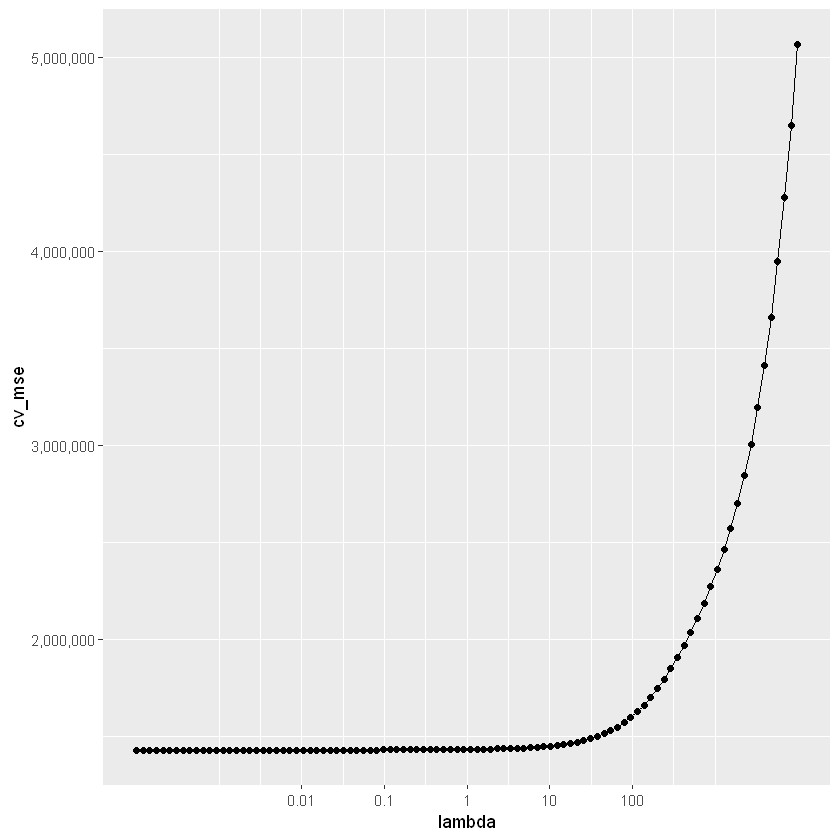

In [166]:
set.seed(1)

#fit ridge regression to the train set and select lambda 

ridgereg_mod = cv.glmnet(y = train$Apps,
                        x = X_train,
                        alpha = 0, #indicates ridge as opposed to lasso
                        lambda = 10^seq(4,-4, length=100),
                        standardize = TRUE,
                        nfolds=10) 

#create dataframe containing lambda values and their associated cv MSE
cv_ridge_results = data.frame(lambda = ridgereg_mod$lambda,
          cv_mse = ridgereg_mod$cvm)

lambda_csverror_plot = cv_ridge_results %>%
ggplot(aes(x=lambda, y=cv_mse)) + 
geom_point() + 
geom_line() + 
scale_x_continuous(trans = 'log10', breaks = c(0.01, 0.1, 1, 10, 100), labels = c(0.01, 0.1, 1, 10, 100)) + 
scale_y_continuous(labels = scales::comma_format())

lambda_csverror_plot

In [167]:
best_row = cv_ridge_results[which(cv_ridge_results$cv_mse==min(cv_ridge_results$cv_mse)),]

best_lambda_val = best_row$lambda

In [168]:
ridge_best <- glmnet(y = train$Apps,
                           x = X_train,
                           alpha = 0, 
                           lambda = 10^seq(4,-4, length = 100))

best_ridge_preds <- predict(ridge_best, s = best_lambda_val, newx = X_test)
ridge_mse = MSE_calc(best_ridge_preds,test$Apps)
print(ridge_mse)

[1] 1155064


### (d) The Lasso

In [169]:
set.seed(4)

lasso_reg <- cv.glmnet(y = train$Apps, 
                         x = X_train, 
                         alpha = 1, #indicates lasso
                         lambda = 10^seq(4, -4, length = 100), 
                         standardize = TRUE, 
                         nfolds = 10)

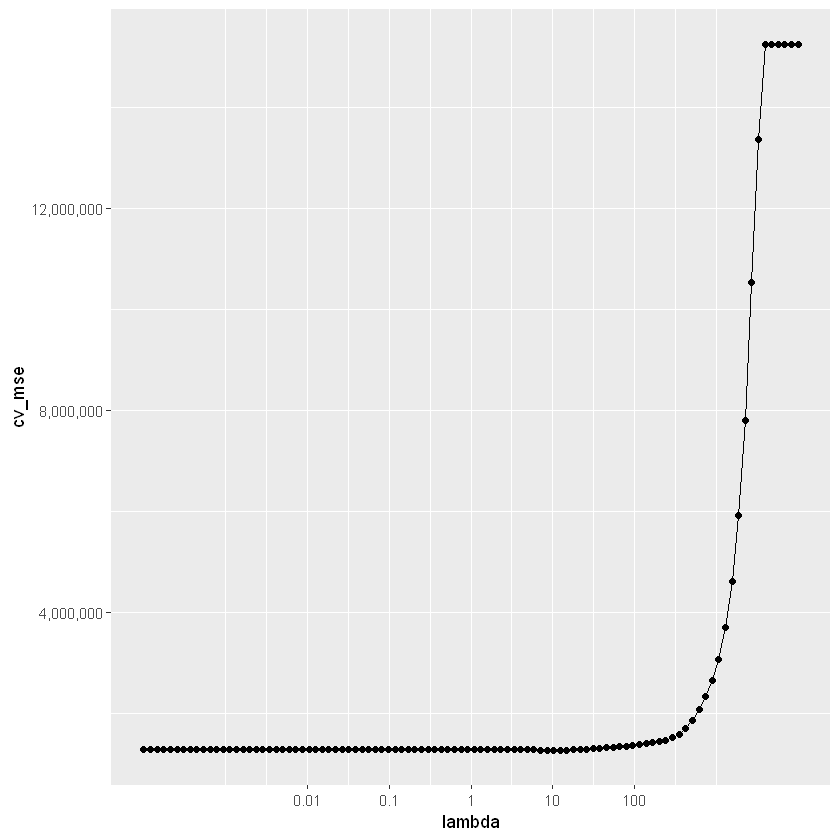

In [170]:
#create dataframe containing lambda values and their associated cv MSE
cv_lasso_results = data.frame(lambda = lasso_reg$lambda,
          cv_mse = lasso_reg$cvm) 
cv_lasso_results %>%
ggplot(aes(x = lambda, y = cv_mse)) + 
  geom_point() + 
  geom_line() + 
scale_x_continuous(trans = 'log10', breaks = c(0.01, 0.1, 1, 10, 100), labels = c(0.01, 0.1, 1, 10, 100)) + 
scale_y_continuous(labels = scales::comma_format())

In [171]:
min(cv_lasso_results$lambda)

[1] 1e-04

In [172]:
best_lasso = glmnet(y = train$Apps,
                           x = X_train,
                           alpha = 1, 
                           lambda = 10^seq(4,-4, length = 100))

lasso_preds <- predict(best_lasso, s = min(cv_lasso_results$lambda), newx = X_test)

lasso_mse = MSE_calc(lasso_preds,test$Apps)
print(lasso_mse)

[1] 1155081


### (e) PCR (Principal Components Regression)

* Fit a PCR model on the training set, with M chosen by cross-validation. Report the test error obtained, along with the value of M selected by cross-validation.

In [175]:
set.seed(5)

pcr_lm = pcr(Apps ~ .,
                 data = train, 
                 scale = T, 
                 validation = "CV")

pcr_lm_mse = MSEP(pcr_lm, estimate = "CV")$val %>%
  reshape2::melt() %>%
  mutate(Components = 0:(nrow(.)-1)) %>%
  rename(CV_MSE = value)

pcr_lm_mse

estimate,response,model,CV_MSE,Components
<fct>,<fct>,<fct>,<dbl>,<int>
CV,Apps,(Intercept),15200411,0
CV,Apps,1 comps,14490189,1
CV,Apps,2 comps,4483882,2
CV,Apps,3 comps,4528317,3
CV,Apps,4 comps,3278778,4
CV,Apps,5 comps,2973027,5
CV,Apps,6 comps,2942744,6
CV,Apps,7 comps,2958555,7
CV,Apps,8 comps,2774056,8


* Does not reduce dimensionality, the best MSE is that of the model with 17 Components 

In [176]:
#eval test mse

pcr_preds = predict(pcr_lm, test, ncomp = 17)
pcr_mse = MSE_calc(pcr_preds,test$Apps)
print(pcr_mse)

[1] 1155090


* All results have been the same as OLS 

### (f) PLSR

In [178]:
set.seed(5)

pls_lm <- plsr(Apps ~ .,
                  data = train, 
                  scale = T, 
                  validation = "CV")

pls_lm_mse <- MSEP(pls_lm, estimate = "CV")$val %>%
  reshape2::melt() %>%
  mutate(Components = 0:(nrow(.)-1)) %>%
  rename(CV_MSE = value)

pls_lm_mse

estimate,response,model,CV_MSE,Components
<fct>,<fct>,<fct>,<dbl>,<int>
CV,Apps,(Intercept),15200411,0
CV,Apps,1 comps,3804993,1
CV,Apps,2 comps,3022287,2
CV,Apps,3 comps,2416136,3
CV,Apps,4 comps,2170887,4
CV,Apps,5 comps,1510739,5
CV,Apps,6 comps,1431300,6
CV,Apps,7 comps,1419919,7
CV,Apps,8 comps,1404300,8


In [179]:
pls_preds <- predict(pls_lm, test, ncomp = 17)
pls_MSE = MSE_calc(pls_preds,test$Apps)
print(pls_MSE)

[1] 1155090


### (g) Performance Comparison

In [180]:
TSS = sum((test$Apps - mean(test$Apps))^2)

Rsquared = function(real, predicted, TSS){
    test_rsquare = 1 - sum((real - predicted)^2) / TSS
return(test_rsquare)
}

In [181]:
#create data frame

data.frame(model = c("OLS", "Ridge","Lasso","PCR","PLS"),
          test_MSE = c(OLS_mse, ridge_mse,lasso_mse,pcr_mse,pls_mse),
          test_R2 = c(Rsquared(test$Apps,lm_OLS_preds,TSS),Rsquared(test$Apps,best_ridge_preds,TSS),Rsquared(test$Apps,lasso_preds,TSS),Rsquared(test$Apps,pcr_preds,TSS),Rsquared(test$Apps,pls_preds,TSS)))



model,test_MSE,test_R2
<chr>,<dbl>,<dbl>
OLS,1155090,0.9204109
Ridge,1155064,0.9204126
Lasso,1155081,0.9204115
PCR,1155090,0.9204109
PLS,1155090,0.9204109


In [182]:
difference = (1155090 - 1155064)
percentage_improved = difference/1155090
percentage_improved 

[1] 2.250907e-05

* There's almost no performance increase between the models both in R-squared and test MSE. However, Ridge did perform the best in terms of test MSE. However, it's performance was only 2.25090685574284e-07% lower.

## Chapter 7 Exercise 9

This question uses the variables dis (the weighted mean of distances to five Boston employment centers) and nox (nitrogen oxides concentration in parts per 10 million) from the Boston data. We will treat dis as the predictor and nox as the response.

In [183]:
data('Boston')

In [184]:
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


### (a) Cubic Poly

Use the poly() function to fit a cubic polynomial regression to predict nox using dis. Report the regression output, and plot the resulting data and polynomial fits.

In [185]:
model_poly <- lm(nox ~ poly(dis, 3, raw = T), data = Boston)
summary(model_poly)


Call:
lm(formula = nox ~ poly(dis, 3, raw = T), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121130 -0.040619 -0.009738  0.023385  0.194904 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             0.9341281  0.0207076  45.110  < 2e-16 ***
poly(dis, 3, raw = T)1 -0.1820817  0.0146973 -12.389  < 2e-16 ***
poly(dis, 3, raw = T)2  0.0219277  0.0029329   7.476 3.43e-13 ***
poly(dis, 3, raw = T)3 -0.0008850  0.0001727  -5.124 4.27e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06207 on 502 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7131 
F-statistic: 419.3 on 3 and 502 DF,  p-value: < 2.2e-16


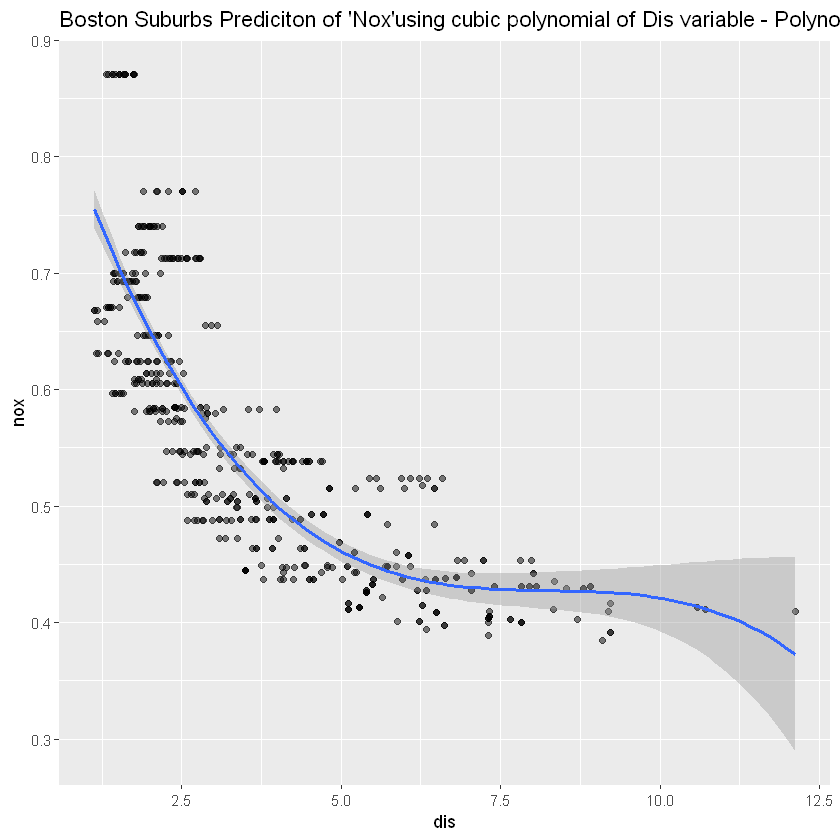

In [190]:
ggplot(Boston, aes(x = dis, y = nox)) + 
  geom_point(alpha = 0.5) + 
  geom_smooth(method = "lm", formula = "y ~ poly(x, 3, raw = T)") + 
  labs(title = "Boston Suburbs Prediciton of 'Nox'using cubic polynomial of Dis variable - Polynomial Regression")

### (b) Training MSE for different polynomial terms of `dis`

Plot the polynomial fits for a range of different polynomial degrees (say, from 1 to 10), and report the associated residual sum of squares.

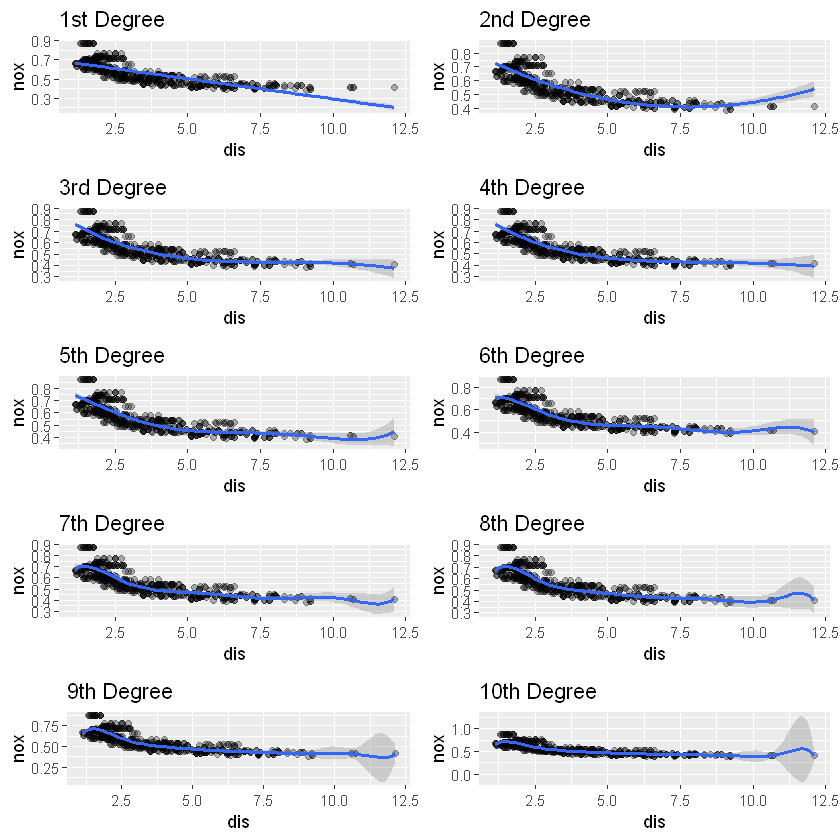

In [192]:
deg1 <- ggplot(Boston, aes(x = dis, y = nox)) + 
  geom_point(alpha = 0.3) + 
  geom_smooth(method = "lm", formula = "y ~ poly(x, 1, raw = T)") + 
  labs(title = "1st Degree")

deg2 <- ggplot(Boston, aes(x = dis, y = nox)) + 
  geom_point(alpha = 0.3) + 
  geom_smooth(method = "lm", formula = "y ~ poly(x, 2, raw = T)") + 
  labs(title = "2nd Degree")

deg3 <- ggplot(Boston, aes(x = dis, y = nox)) + 
  geom_point(alpha = 0.3) + 
  geom_smooth(method = "lm", formula = "y ~ poly(x, 3, raw = T)") + 
  labs(title = "3rd Degree")

deg4 <- ggplot(Boston, aes(x = dis, y = nox)) + 
  geom_point(alpha = 0.3) + 
  geom_smooth(method = "lm", formula = "y ~ poly(x, 4, raw = T)") + 
  labs(title = "4th Degree")

deg5 <- ggplot(Boston, aes(x = dis, y = nox)) + 
  geom_point(alpha = 0.3) + 
  geom_smooth(method = "lm", formula = "y ~ poly(x, 5, raw = T)") + 
  labs(title = "5th Degree")

deg6 <- ggplot(Boston, aes(x = dis, y = nox)) + 
  geom_point(alpha = 0.3) + 
  geom_smooth(method = "lm", formula = "y ~ poly(x, 6, raw = T)") + 
  labs(title = "6th Degree")

deg7 <- ggplot(Boston, aes(x = dis, y = nox)) + 
  geom_point(alpha = 0.3) + 
  geom_smooth(method = "lm", formula = "y ~ poly(x, 7, raw = T)") + 
  labs(title = "7th Degree")

deg8 <- ggplot(Boston, aes(x = dis, y = nox)) + 
  geom_point(alpha = 0.3) + 
  geom_smooth(method = "lm", formula = "y ~ poly(x, 8, raw = T)") + 
  labs(title = "8th Degree")

deg9 <- ggplot(Boston, aes(x = dis, y = nox)) + 
  geom_point(alpha = 0.3) + 
  geom_smooth(method = "lm", formula = "y ~ poly(x, 9, raw = T)") + 
  labs(title = "9th Degree")

deg10 <- ggplot(Boston, aes(x = dis, y = nox)) + 
  geom_point(alpha = 0.3) + 
  geom_smooth(method = "lm", formula = "y ~ poly(x, 10, raw = T)") + 
  labs(title = "10th Degree")

grid.arrange(deg1, deg2, deg3, deg4, deg5, deg6, deg7, deg8, deg9, deg10, ncol = 2)

In [199]:
training_MSE = c()
degree = c()

for (i in 1:10) {
    model = lm(nox ~ poly(dis, i, raw = T), data = Boston)
    training_MSE[i] = mean((model$residuals^2))
    degree[i] = i
}

data.frame(training_MSE,degree)

training_MSE,degree
<dbl>,<int>
0.005471468,1
0.004022257,2
0.003822345,3
0.003820121,4
0.003785158,5
0.003711971,6
0.003655106,7
0.003627727,8
0.003623183,9


`training_MSE` is lowest for a polynomial of degree 10, which is to be expected as RSS and therefore MSE decrease monotonically as the flexbility of the model increases. 

### (c) Tuning the Degree

* Perform cross-validation or another approach to select the optimal degree for the polynomial, and explain your results.

In [211]:
controller <- trainControl(method = "repeatedcv", number = 5, repeats = 3)

MSE_CV = c()

set.seed(159)

for (i in 1:10) {
  model_temp <- train(y = Boston$nox,
                      x = poly(Boston$dis, i, raw = T, simple = T),
                      method = "lm",
                      trControl = controller)
  MSE_CV[i] <- model_temp$results
}

MSE_CV


Warning message in MSE_CV[i] <- model_temp$results:
"number of items to replace is not a multiple of replacement length"
Warning message in MSE_CV[i] <- model_temp$results:
"number of items to replace is not a multiple of replacement length"
Warning message in MSE_CV[i] <- model_temp$results:
"number of items to replace is not a multiple of replacement length"
Warning message in MSE_CV[i] <- model_temp$results:
"number of items to replace is not a multiple of replacement length"
Warning message in MSE_CV[i] <- model_temp$results:
"number of items to replace is not a multiple of replacement length"
Warning message in MSE_CV[i] <- model_temp$results:
"number of items to replace is not a multiple of replacement length"
Warning message in MSE_CV[i] <- model_temp$results:
"number of items to replace is not a multiple of replacement length"
Warning message in MSE_CV[i] <- model_temp$results:
"number of items to replace is not a multiple of replacement length"
Warning message in MSE_CV[i] <- 

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

## Chapter 7 Exercise 10

This question relates to the College data set.

### (a) Forward Stepwise Selection

* Q: Split the data into a training set and a test set. Using out-of-state tuition as the response and the other variables as the predictors, perform forward stepwise selection on the training set in order to identify a satisfactory model that uses just a subset of the predictors.

In [219]:
data('College')

In [214]:
# 70:30 split 

smpl_size = floor(0.7 * nrow(College))

#set seed to make the split reproducible
set.seed(0)
#create random sample of indexes for train set
train_index = sample(seq_len(nrow(College)), size=smpl_size)

train = College[train_index,]
test = College[-train_index,]

In [223]:
college_lm_outstate <- lm(Outstate ~ ., data = College)
forward_selection = ols_step_forward_p(college_lm_outstate)
forward_selection


                                 Selection Summary                                  
-----------------------------------------------------------------------------------
        Variable                     Adj.                                              
Step      Entered      R-Square    R-Square      C(p)          AIC          RMSE       
-----------------------------------------------------------------------------------
   1    Expend           0.4526      0.4519    1020.9612    14639.6540    2978.3237    
   2    Private          0.6064      0.6053     519.1193    14385.4837    2527.3225    
   3    Room.Board       0.6826      0.6814     271.2481    14220.2147    2270.8839    
   4    perc.alumni      0.7192      0.7178     153.2707    14126.9959    2137.2994    
   5    PhD              0.7370      0.7353      96.8775    14078.0599    2069.7209    
   6    Grad.Rate        0.7473      0.7454      65.1428    14049.0363    2030.1282    
   7    Personal         0.7499      0.747

In [225]:
best_model = lm(Outstate ~ Expend + Private + Room.Board + perc.alumni + PhD + Grad.Rate, data = College)

Forward selection displays the 6-variable model had the best RMSE.

### (b) GAM Plot

* Fit a GAM on the training data, using out-of-state tuition as the response and the features selected in the previous step as the predictors. Plot the results, and explain your findings.

In [226]:
coef(best_model)

(Intercept)        Expend    PrivateYes    Room.Board   perc.alumni 
-3553.2345268     0.2210255  2768.6347025     0.9679086    48.4221031 
          PhD     Grad.Rate 
   35.5283359    29.7119093

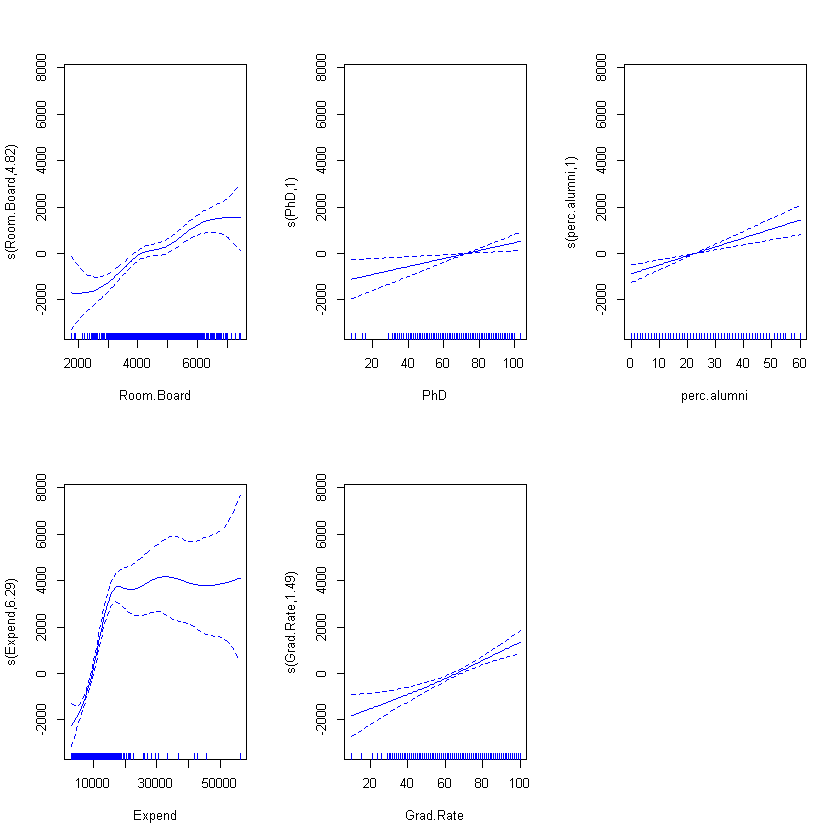

In [228]:
gam_model <- gam(Outstate ~ Private + s(Room.Board) + s(PhD) + s(perc.alumni) + s(Expend) + s(Grad.Rate), data = train)

par(mfrow = c(2, 3))
plot(gam_model, se = T, col = "blue")

### (c) `test` Performance

In [229]:
mean((predict(gam_model, newdata = test) - test$Outstate)^2)

[1] 3593606

In [230]:
test_TSS <- sum((test$Outstate - mean(test$Outstate))^2)
test_RSS <- sum((predict(gam_model, newdata = test) - test$Outstate)^2)

1 - test_RSS/test_TSS

[1] 0.7485189

### (d) Detecting Non-Linear Relationships

In [231]:
summary(gam_model)


Family: gaussian 
Link function: identity 

Formula:
Outstate ~ Private + s(Room.Board) + s(PhD) + s(perc.alumni) + 
    s(Expend) + s(Grad.Rate)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   8709.9      192.9   45.16   <2e-16 ***
PrivateYes    2565.4      238.1   10.78   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                 edf Ref.df      F  p-value    
s(Room.Board)  4.821  5.954 10.721  < 2e-16 ***
s(PhD)         1.000  1.000  7.024  0.00829 ** 
s(perc.alumni) 1.000  1.000 20.836 6.63e-06 ***
s(Expend)      6.292  7.443 31.489  < 2e-16 ***
s(Grad.Rate)   1.493  1.849 20.310  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.798   Deviance explained = 80.4%
GCV = 3.5216e+06  Scale est. = 3.4139e+06  n = 543

* All variables are significant

### Sources

Some of the solution code in this notebook was source from the following URL: 